<a href="https://colab.research.google.com/github/mabidnadzif/analisis_santimen/blob/main/Uts027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from serpapi import GoogleSearch
from urllib.parse import *

In [15]:
params = {
  "engine": "google_maps",
  "q": "rumah sakit semarang",
  "ll": "@-6.9942114,110.3964389,15z",
  "type": "search",
  "api_key": "2bbddac49d1fe4a6be5d60e7f530c96c364d45eba6ae0eae93527c0b6fa97175"
}

search = GoogleSearch(params)

mData = 0 # Angka indeks dari data
mJumlah = 6 # Batas jumlah data yang ditampilkan
local_results = []

while mData <= mJumlah:
  results = search.get_dict()

  for result in results["local_results"]:
    mData += 1
    
    if mData <= mJumlah:
      
      # Jika jumlah review kurang dari 100, maka jangan masukkan datanya
      if result["reviews"] <100 :
        mJumlah += 1
        continue
        
      # Append data sesuai dengan batas jumlah yang sudah ditentukan
      local_results.append({'title': result["title"],
                           'data_id': result["data_id"],
                           'reviews_total': result["reviews"]});

  if "next" in results.get("serpapi_pagination", {}):
    # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
    search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

  else:
    break

https://serpapi.com/search


In [16]:
for rvw in local_results:
  print(rvw)

{'title': 'RS Columbia Asia Semarang', 'data_id': '0x2e708b2919118d71:0x942234e844ee9d94', 'reviews_total': 1622}
{'title': 'Central General Hospital Dr. Kariadi Semarang', 'data_id': '0x2e708b41831c7b9d:0xcb17f1f8f9b49a67', 'reviews_total': 2286}
{'title': 'Bhakti Wira Tamtama Hospital', 'data_id': '0x2e708b467243df0d:0x1eb193418aac7fb8', 'reviews_total': 422}
{'title': 'St. Elisabeth Hospital', 'data_id': '0x2e708b653aa10745:0xc606ebcf82ab4bf4', 'reviews_total': 709}
{'title': 'RSU William Booth', 'data_id': '0x2e708b6e423ee06d:0x21abfff759bc9e2a', 'reviews_total': 271}
{'title': 'RSIA Anugerah Semarang', 'data_id': '0x2e708b40de9c3df1:0x29758a318ea2802', 'reviews_total': 114}


In [17]:
data = {'rumah sakit semarang':[],
        'name':[],
        'rating':[],
        'review':[]}

for rvw in local_results:
  
  params = {
    "engine": "google_maps_reviews",
    "data_id": "",
    "hl" : "id",
    "api_key": "2bbddac49d1fe4a6be5d60e7f530c96c364d45eba6ae0eae93527c0b6fa97175"
    
  }
  
  params["data_id"] = rvw['data_id']

  search = GoogleSearch(params)

  mData = 0 # Angka indeks dari data
  mJumlah = 100 # Batas jumlah data yang ditampilkan

  while mData <= mJumlah:
    results = search.get_dict()

    for result in results["reviews"]:
      mData += 1

      if mData <= mJumlah:
        # Append data sesuai dengan batas jumlah yang sudah ditentukan
        data['rumah sakit semarang'].append(rvw['title']);
        data['name'].append(result["user"]["name"]);
        data['rating'].append(result["rating"]);
        data['review'].append(result["snippet"]);
        

    if "next" in results.get("serpapi_pagination", {}):
      # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
      search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

    else:
      break
    
review_original = data['review']

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
h

In [18]:
import pandas as pd


In [20]:
df_original = pd.DataFrame(data)
df_original.to_csv('csv/review_tanpa_preprocessing.csv', index=False)

In [ ]:
df_original

,rumah sakit semarang,name,rating,review
0,RS Columbia Asia Semarang,YN Official,3.0,1. parkiran mobil tidak begitu luas 2. rumah s...
1,RS Columbia Asia Semarang,Septi Radisa,5.0,Hotel berkedok Rumah Sakit 😍 yak nginep disini...
2,RS Columbia Asia Semarang,Wahyuddin Wahyu,1.0,"Pelayanannya sangat lama, ketemu dokternya cum..."
3,RS Columbia Asia Semarang,laurensia natasya,5.0,Selalu senang berobat di sini. Pelayanan dokte...
4,RS Columbia Asia Semarang,Wahyu Ningsih,5.0,Salah satu tempat berjuang untuk mndptkan ketu...
...,...,...,...,...
295,Hermina Hospital Pandanaran,Dewanti Ning Tyazz,5.0,Pelayanan sangat baik. Sudah 4x merasakan pela...
296,Hermina Hospital Pandanaran,Arief Wisuda,3.0,Alangkah lebih baik nya kalo layanan yang suda...
297,Hermina Hospital Pandanaran,Yessy Nurtanti,5.0,Pelayanannya bagus sekali..perawatnya ramah..p...
298,Hermina Hospital Pandanaran,clara bryan,2.0,Sya pernah lahiran disana dan pelayanannya dil...


In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [58]:
filename = "https://raw.githubusercontent.com/mabidnadzif/analisis_santimen/main/review_tanpa_preprocessing.csv"
df = pd.read_csv(filename)
df.head()

,rumah sakit semarang,name,rating,review
0,RS Columbia Asia Semarang,YN Official,3.0,1. parkiran mobil tidak begitu luas 2. rumah s...
1,RS Columbia Asia Semarang,Septi Radisa,5.0,Hotel berkedok Rumah Sakit 😍 yak nginep disini...
2,RS Columbia Asia Semarang,Wahyuddin Wahyu,1.0,"Pelayanannya sangat lama, ketemu dokternya cum..."
3,RS Columbia Asia Semarang,laurensia natasya,5.0,Selalu senang berobat di sini. Pelayanan dokte...
4,RS Columbia Asia Semarang,Wahyu Ningsih,5.0,Salah satu tempat berjuang untuk mndptkan ketu...


In [59]:
df.drop(columns=['rumah sakit semarang','name'], inplace = True)

In [60]:
df.head()

,rating,review
0,3.0,1. parkiran mobil tidak begitu luas 2. rumah s...
1,5.0,Hotel berkedok Rumah Sakit 😍 yak nginep disini...
2,1.0,"Pelayanannya sangat lama, ketemu dokternya cum..."
3,5.0,Selalu senang berobat di sini. Pelayanan dokte...
4,5.0,Salah satu tempat berjuang untuk mndptkan ketu...


Preprocessing Code

1. Cleaning text

In [61]:
import string
import re

In [62]:
def clean_review(review):
    return re.sub('[^a-zA-Z]', ' ', review).lower()
  
df['cleaned_review'] = df['review'].apply(lambda x: clean_review(str(x)))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

2. Adding Additional features (lenght of, and percentage of punctuations in the text)

In [63]:
def count_punct(review):
    count = sum([1 for char in review if char in string.punctuation])
    return round(count/(len(review) - review.count(" ")), 3)*100
  
df['review_len'] = df['review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(str(x)))
df

,rating,review,cleaned_review,label,review_len,punct
0,3.0,1. parkiran mobil tidak begitu luas 2. rumah s...,parkiran mobil tidak begitu luas rumah s...,0,531,3.6
1,5.0,Hotel berkedok Rumah Sakit 😍 yak nginep disini...,hotel berkedok rumah sakit yak nginep disini...,1,487,2.9
2,1.0,"Pelayanannya sangat lama, ketemu dokternya cum...",pelayanannya sangat lama ketemu dokternya cum...,0,427,3.3
3,5.0,Selalu senang berobat di sini. Pelayanan dokte...,selalu senang berobat di sini pelayanan dokte...,1,258,3.1
4,5.0,Salah satu tempat berjuang untuk mndptkan ketu...,salah satu tempat berjuang untuk mndptkan ketu...,1,148,2.0
...,...,...,...,...,...,...
595,3.0,NaN,nan,0,3,0.0
596,4.0,NaN,nan,1,3,0.0
597,5.0,NaN,nan,1,3,0.0
598,5.0,NaN,nan,1,3,0.0


3. Tokenization

In [64]:
def tokenize_review(review):
    tokenized_review = review.split()
    return tokenized_review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens
0,3.0,1. parkiran mobil tidak begitu luas 2. rumah s...,parkiran mobil tidak begitu luas rumah s...,0,531,3.6,"[parkiran, mobil, tidak, begitu, luas, rumah, ..."
1,5.0,Hotel berkedok Rumah Sakit 😍 yak nginep disini...,hotel berkedok rumah sakit yak nginep disini...,1,487,2.9,"[hotel, berkedok, rumah, sakit, yak, nginep, d..."
2,1.0,"Pelayanannya sangat lama, ketemu dokternya cum...",pelayanannya sangat lama ketemu dokternya cum...,0,427,3.3,"[pelayanannya, sangat, lama, ketemu, dokternya..."
3,5.0,Selalu senang berobat di sini. Pelayanan dokte...,selalu senang berobat di sini pelayanan dokte...,1,258,3.1,"[selalu, senang, berobat, di, sini, pelayanan,..."
4,5.0,Salah satu tempat berjuang untuk mndptkan ketu...,salah satu tempat berjuang untuk mndptkan ketu...,1,148,2.0,"[salah, satu, tempat, berjuang, untuk, mndptka..."


4. Lemmatization and Removing Stopwords

In [65]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [66]:
def lemmatize_review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,3.0,1. parkiran mobil tidak begitu luas 2. rumah s...,parkiran mobil tidak begitu luas rumah s...,0,531,3.6,"[parkiran, mobil, tidak, begitu, luas, rumah, ...",parkiran mobil tidak begitu luas rumah sakit b...
1,5.0,Hotel berkedok Rumah Sakit 😍 yak nginep disini...,hotel berkedok rumah sakit yak nginep disini...,1,487,2.9,"[hotel, berkedok, rumah, sakit, yak, nginep, d...",hotel berkedok rumah sakit yak nginep disini b...
2,1.0,"Pelayanannya sangat lama, ketemu dokternya cum...",pelayanannya sangat lama ketemu dokternya cum...,0,427,3.3,"[pelayanannya, sangat, lama, ketemu, dokternya...",pelayanannya sangat lama ketemu dokternya cuma...
3,5.0,Selalu senang berobat di sini. Pelayanan dokte...,selalu senang berobat di sini pelayanan dokte...,1,258,3.1,"[selalu, senang, berobat, di, sini, pelayanan,...",selalu senang berobat di sini pelayanan dokter...
4,5.0,Salah satu tempat berjuang untuk mndptkan ketu...,salah satu tempat berjuang untuk mndptkan ketu...,1,148,2.0,"[salah, satu, tempat, berjuang, untuk, mndptka...",salah satu tempat berjuang untuk mndptkan ketu...


EDA

In [67]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"rating 1.0 = { len(df[df['rating']==1.0]) } rows")
print(f"rating 2.0 = { len(df[df['rating']==2.0]) } rows")
print(f"rating 3.0 = { len(df[df['rating']==3.0]) } rows")
print(f"rating 4.0 = { len(df[df['rating']==4.0]) } rows")
print(f"rating 5.0 = { len(df[df['rating']==5.0]) } rows")

Input data has 600 rows and 8 columns
rating 1.0 = 132 rows
rating 2.0 = 20 rows
rating 3.0 = 43 rows
rating 4.0 = 63 rows
rating 5.0 = 342 rows


Number of null in label: 0
Number of null in text: 29


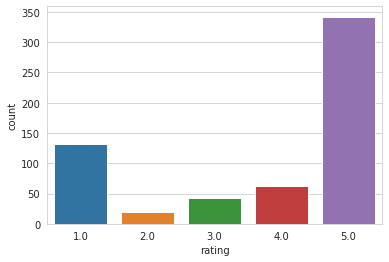

In [68]:
# Missing values in the dataset
print(f"Number of null in label: { df['rating'].isnull().sum() }")
print(f"Number of null in text: { df['review'].isnull().sum() }")
sns.countplot(x='rating', data=df);

Visualizing Word Clouds

In [69]:
from wordcloud import WordCloud

In [70]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0) ]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0) ]

#convert to list
negative_list= df_negative['lemmatized_review'].tolist()
positive_list=df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()

Postive Reviews

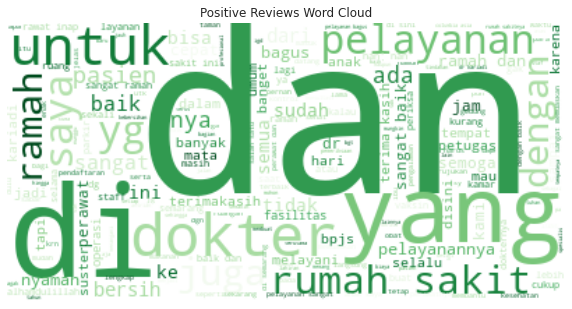

In [71]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

Negative Reviews

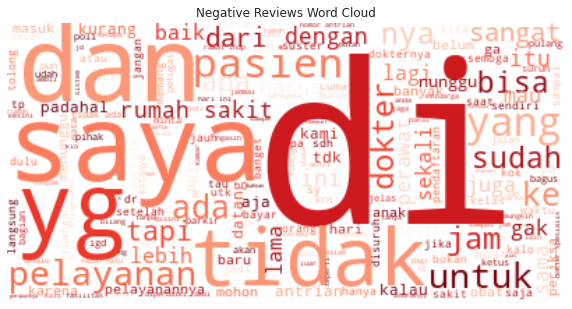

In [72]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

Feature Extraction from Text

Bag of words model

In [73]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(600, 3)
(600,)


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 3)
(180, 3)
(420,)
(180,)


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,...,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215
0,39,5.1,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,3,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,535,4.5,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.159955,0.0,0.0,0.0,0.0,0.106248,0.0
3,348,7.2,0.168445,0.0,0.15637,0.0,0.0,0.0,0.0,0.0,...,0.1618,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,17,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


Training different Classification models

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.90      0.13      0.23        69
           1       0.65      0.99      0.78       111

    accuracy                           0.66       180
   macro avg       0.77      0.56      0.51       180
weighted avg       0.74      0.66      0.57       180



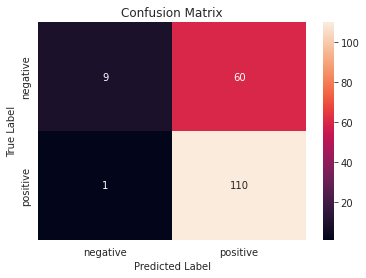

In [77]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.91      0.46      0.62        69
           1       0.74      0.97      0.84       111

    accuracy                           0.78       180
   macro avg       0.83      0.72      0.73       180
weighted avg       0.81      0.78      0.76       180



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


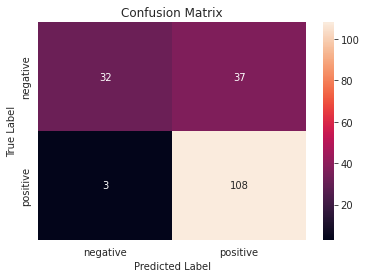

In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.83      0.42      0.56        69
           1       0.72      0.95      0.82       111

    accuracy                           0.74       180
   macro avg       0.78      0.68      0.69       180
weighted avg       0.76      0.74      0.72       180



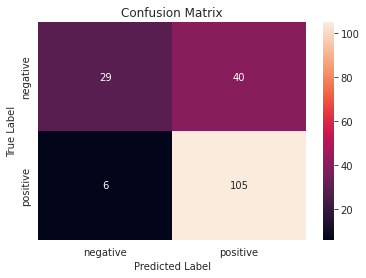

In [79]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.84      0.70      0.76        69
           1       0.83      0.92      0.87       111

    accuracy                           0.83       180
   macro avg       0.84      0.81      0.82       180
weighted avg       0.83      0.83      0.83       180



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


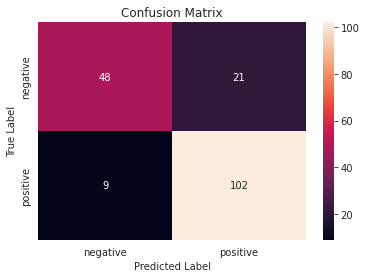

In [80]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.49      0.33      0.40        69
           1       0.65      0.78      0.71       111

    accuracy                           0.61       180
   macro avg       0.57      0.56      0.55       180
weighted avg       0.59      0.61      0.59       180



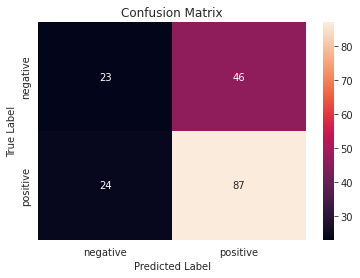

In [81]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The best performing algorithms so far seem to be Linear SVM, Random Forest and Logistic Regression Classifiers.

In [82]:
from sklearn.model_selection import cross_val_score

models = [MultinomialNB(), LogisticRegression(), RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'), KNeighborsClassifier(n_neighbors = 5)]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 accuracy - 0.7333333333333333 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 precision - 0.728492045974112 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 recall - 0.9933333333333334 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 f1 - 0.8395141136675124 

Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

 accuracy - 0.8119047619047619 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

 precision - 0.8045648671712913 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

 recall - 0.9694252873563218 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

 f1 - 0.878448738883008 

Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 accuracy - 0.8357142857142857 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 precision - 0.8200358401784673 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 recall - 0.965977011494253 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 f1 - 0.8988016177280571 

SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 accuracy - 0.8714285714285716 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 precision - 0.8910688510817412 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 recall - 0.9351724137931035 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 f1 - 0.9108427689955729 

KNN


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 accuracy - 0.7142857142857142 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 precision - 0.7544693730761842 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

 recall - 0.8777011494252875 
 f1 - 0.8105581667904129 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

In [83]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.8055555555555556

In [85]:
data = ["Buruk", "Baik", "Saya tidak suka dengan pelayanannya, karena sangat buruk", "perawatnya sangat ramah"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[0 1 1 1]


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [87]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8666666666666667

In [88]:
data = ["Buruk", "Baik", "Saya tidak suka dengan pelayanannya, karena sangat buruk", "perawatnya sangat ramah"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[0 1 1 1]
